# Testing GraphSearch Distance Concepts

## Load Libraries

In [11]:
import srex

## Initialize some objects / variables

In [12]:
st = srex.PorterStemmer()

In [13]:
#Download stopword
import nltk
nltk.download('stopwords') 
nltk.download('punkt') # Tokenizers
nltk.download('wordnet') # Wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patricio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/patricio/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/patricio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
stop_words_list = srex.stopwords.words('english') #a small one

In [15]:
newStopWords = srex.get_stop_words('en') # a big one

In [16]:
stop_words_list.extend(newStopWords) # all together

# Calculo de grafos a partir de los términos en un documento

La idea es calcular una vecindad de los términos de búsqueda, dentro de un documento. Es decir, qué palabras se encuentran cerca de los términos de busqueda en un documento determinado.

## Definición de los documentos a analizar

In [30]:
# Articulo de revista científica IEEE Explore
#doc = srex.get_ieee_explore_article('article_number', '8316016')

# Ranking de documentos de IEEE Explore sin ponderación de documentos
doc = srex.get_ieee_explore_ranking("cyber security", 5)

## Segmentamos el documento en un arreglo de párrafos, segun su puntuación.
El grafo en cuestión debiera representar los términos de un concepto presente en los documentos analizados. En este caso existe un problema cuando se quiere generar un grafo con un documento compuesto por varios párrafos. En general, palabras cercanas en los extremos de dos parrafos no siempre comparten la misma idea o concepto, a pesar de ser terminos vecinos. Esto generaría una incosistencia en el grafo generado.
Como solución se propone considerar documentos mas pequeños (unitarios) que encierren un sólo concepto o idea. Para ello, definiremos el párrafo como documento unitario, desde los cuales se pueden generar un grafo. Los grafos generados se integran al final del análisis para producir el grafo final correspondiente al documento completo. 
En la integración se pueden tambien considerar parrafos que comprendan mas de un documento, como por ejemplo un ranking de documentos.

Los párrafos son generados entonces a través de los signos de puntuación: punto seguidos y punto aparte.

En los calculos siguientes el documento inicial será dividido en sus párrafos generando documentos mas pequeños, que serán analizados como tales.

In [33]:
parragraphs_list = list(map(lambda x: x['abstract'], doc))

## Aplicamos algunas funciones de procesamiento de texto 
Se utiliza el método **text_transformations()**, que contiene funciones de stop word, stemming, lemma, etc.

In [35]:
processed_parragraphs_list = list(map(lambda x: srex.text_transformations(x, stop_words_list, lema=True, stem=False), parragraphs_list))

#### Print the modified documents (parragraphs)

for index, doc in enumerate(processed_parragraphs_list):
    print('parragraph',index, ':', doc)

## Calculamos la matriz de posiciones
Esta matriz corresponde a un arreglo de diccionarios, en donde cada elemento del arreglo corresponde a un parrafo del documento.

In [36]:
doc_pos_matrix = srex.get_documents_positions_matrix(processed_parragraphs_list)

## Calculamos una matriz con la **vecindad** para un término especifico
La matriz de vecindad define la distancia entre un término de referencia (busqueda) y los demás términos del documento 

In [37]:
# Get the vecinity matrix using the following parameters:
reference_term         = 'security' 

In [38]:
# Para calcular la vecindad a un termino de búsqueda definimos una distancia límite de cálculo (limit_distance). Por ejemplo, si limit_distance=4, el cálculo de la vecindad considerará sólo hasta 4 terminos de distancia desde la posición del término de búsqueda. Con esto se evita que se realicen comparaciones cruzadas entre terminos de búsqueda que se encuentran distribuidos a lo largo del documento.
limit_distance         = 4 

In [39]:
# Sumarize es define la función para procesar (compilar) las distancias de los terminos de la vecinadad. Existen 3 posibles valores: 'none' no aplica ninguna función de sumarización, 'mean' calcula la media de las distancias en la vecinadad, 'median' calcula la mediana de los terminos en la vecinadad.
sumarize               = 'none' 

In [40]:
# Define si el termino de referencia se compara consigo mismo para el cálculo de la vecindad.
include_reference_term = False

In [41]:
vecinity_matrix = srex.get_vecinity_matrix(doc_pos_matrix, reference_term, limit_distance, sumarize, include_reference_term)

## Se reduce la matriz anterior a un diccionario con las distancias de la vecindad
Este método procesa las distancia al termino de búsqueda en cada parrafo y genera un diccionario que contiene todas las distancias al termino de referencia, asociadas al documento total.
Por ejemplo: supongamos que el documento tiene 2 párrafos. En el primer parrafo 'termA' esta a distancia 2 del término dereferencia, es decir, 'termA':[2]. En el segundo parrafo 'termA' esta a distancia 3 del término dereferencia, es decir, 'termA':[3]. Luego el resultado en el diccionario sería: 'termA':[2,3]

In [42]:
unique_vecinity_dict = srex.get_unique_vecinity_dict(vecinity_matrix)

## Calculamos un diccionario con los términos más frecuentes de la vecindad
Se calcula un nuevo diccionario que contine la frequencia de los vecinos más cercanos al términos de búsqueda.

In [43]:
terms_freq_dict = {k: len(v) for k, v in unique_vecinity_dict.items()}

In [44]:
terms_freq_dict

{'framework': 1,
 'human': 1,
 'fatigue': 1,
 'behaviour': 1,
 'false': 1,
 'sense': 1,
 'proposed': 1,
 'maximizes': 1,
 'attacker': 1,
 'searching': 1,
 'vulnerability': 4,
 'android': 3,
 'application': 5,
 'exploit': 3,
 'load': 1,
 'technique': 1,
 'order': 1,
 'ass': 1,
 'risk': 1,
 'market': 1,
 'suspicious': 1,
 'deeply': 1,
 'develop': 1,
 'solution': 1,
 'integration': 1,
 'protocol': 1,
 'demonstrate': 1,
 'data': 1,
 'network': 1,
 'traffic': 1,
 'simulation': 1,
 'paradigm': 1,
 'spectrum': 1,
 'mechanism': 1,
 'fail': 1,
 'provide': 1,
 'adequate': 1,
 'neglect': 1,
 'online': 1,
 'fashion': 1,
 'prost': 1,
 'constructed': 1,
 'based': 1,
 'carefully': 1,
 'designed': 1,
 'building': 1,
 'block': 1,
 'support': 1,
 'arithmetic': 1,
 'theoretically': 1,
 'prove': 1,
 'realize': 1,
 'adversary': 1,
 'extensively': 1,
 'evaluate': 1,
 'performance': 1}

## Ordena los términos más frecuentes de la vecindad

In [45]:
import operator
sorted_terms_freq_dict = sorted(terms_freq_dict.items(), key=operator.itemgetter(1), reverse=True)

## Obtiene los top-N terminos más frecuentes

In [46]:
N=10
first_sorted_terms_freq_dict = {k: v for k, v in list(sorted_terms_freq_dict)[:N]}
first_sorted_terms_freq_dict.keys()

dict_keys(['application', 'vulnerability', 'android', 'exploit', 'framework', 'human', 'fatigue', 'behaviour', 'false', 'sense'])

## Calcula las distancia mediana de los vecinos más frecuentes

Consideraremos las distancias mas frecuentes de cada término. Por ejemplo: el término 'european' se presenta cuatro veces a una distancia menor a 5, siendo el valor "1" la mediana de todas las distancias de este término.

In [47]:
from collections import Counter 
import numpy as np
def most_frequent_distance(List): 
    occurence_count = Counter(List) 
    return occurence_count.most_common(1)[0][0] 

most_freq_distance_dict = {k: {'frequency':terms_freq_dict[k], 'distance':np.median(unique_vecinity_dict[k])} for k in first_sorted_terms_freq_dict.keys()}

In [48]:
most_freq_distance_dict

{'application': {'frequency': 5, 'distance': 3.0},
 'vulnerability': {'frequency': 4, 'distance': 1.5},
 'android': {'frequency': 3, 'distance': 2.0},
 'exploit': {'frequency': 3, 'distance': 3.0},
 'framework': {'frequency': 1, 'distance': 2.0},
 'human': {'frequency': 1, 'distance': 4.0},
 'fatigue': {'frequency': 1, 'distance': 4.0},
 'behaviour': {'frequency': 1, 'distance': 3.0},
 'false': {'frequency': 1, 'distance': 2.0},
 'sense': {'frequency': 1, 'distance': 1.0}}

## Genera el grafo para los términos vecinos más cercanos a la query

In [49]:
graph = srex.getGraphViz(reference_term, most_freq_distance_dict, node_size='0.7')

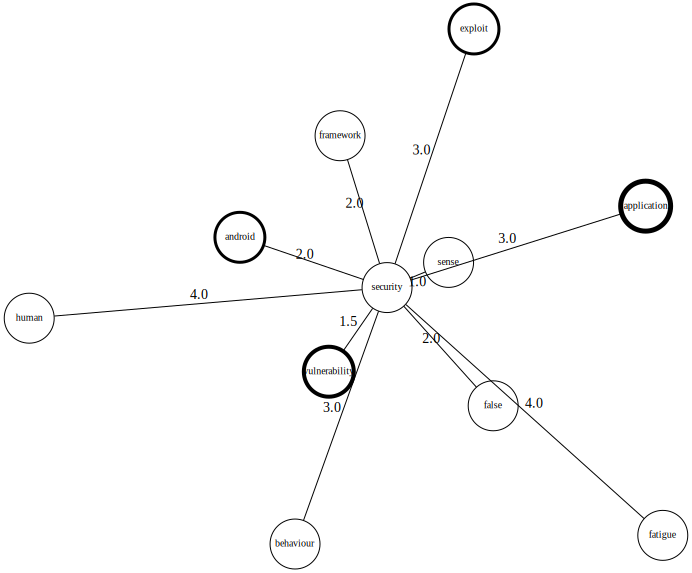

In [50]:
graph

# 2. ¿Cómo operar sobre Grafos?

En las operaciones sobre grafos hay que tomar en cuenta tambien que los grafos podrían tener ponderaciones dictintas. Es decir, podrían haber peraciones como:

- 0.3\*G1 + 0.7\*G2 : Calculo del promedio ponderado entre G1 y G2

Dado que cada nodo tiene dos componentes (distancia y frecuancia) podría usarse el factor de ponderación sobre estos dos valores. 


### Union

1. Para unir dos grafos asociados a un documento hay que considerar 
 1. Que hacer con los terminos iguales
 2. Que hacer con los terminos distintos
 3. Etc.
 

2. Otra alternativas es unir a nivel de documentos y luego generar los grafos. En general es lo mismo que se hace para formar documentos a partir de los parrafos. 

3) En el caso de documentos con distinta ponderación (documentos de un ranking), se podrían resaltar la importancia de los primeros documentos aumentando la frecuencia de sus nodos. Lo que equivale a multiplicar el contenido de los documentos más relevantes del ranking para generar el grafo del ranking total.
Se probó esta alternativa con el método **get_ieee_explore_ranking(q, nr_documents, weighted)**, en donde el parametro weighted puede tener tres valores: none, lineal, inverted.
- **none:** general el documento ranking con los abstracts sin considerar los pesos de la posición del documento en el ranking.
- **lineal:** decrementa linealmente la relevancia del documento segun su posición en el ranking, multiplicando el contenido del documento en base a : 
*document_content * (nro_docs_in_ranking - doc_ranking_position)*
- **inverse:** decrementa linealmente la relevancia del documento segun su posición en el ranking, multiplicando el contenido del documento en base a :
*document_content * math.ceil(nro_docs_in_ranking/(doc_ranking_position))*

**NOTA:** El uso de lineal/inverse no presenta muchas diferencias en la estructura del grafo final.

<img src="images/functions.png">

### Similitud 

Tenemos que definir un indicador de similitud entre grafos. En principio se puede:
1. Comparar las distancias entre aristas similares
2. Comparar el tamaño de los nodos

## Uso en Mapas Sistemáticos

A continuación se presenta un esquema del Proceso del Mapeo Sistemático.
SREX podría ser una herramienta útil para este proceso.

<img src="images/mapa_sistematico.png">